<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/hpdp/BERUK/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT 3

##Group Members

| No. | NAME | MATRIC NO. |
| --- | --- | --- |
| 1. | HAFIZULSHAH BIN SHAROM | A21EC0027 |
| 2. | MUHAMMAD HASAN BIN CHE ABDULLAH | A21EC0077 |
| 3. | ABDUL MUHAIMIN BIN ABDUL RAZAK | A21EC0002 |
| 4. | MUHAMMAD HAZIM BIN SALMAN | A21EC0078 |

##1. Data Selection

### Chess Games Statistics
### Context
Chess is one of the more famous board games of the world and one of the most studied. With it's more than 4 GB of information this can be a good opportunity to work with a huge dataset and practice on how to handle it.

###Content
This dataset contains 6.25 Million chess games played on lichess.org during July of 2016.
Some of the games have Stockfish analysis evaluations like* [%eval 2.35] (235 centipawn advantage)* always from White's point of view. These are evaluations of the movement made by a player. <br><br>

| Event | Game type |
| --- | --- |
| White | White's ID. |
| Black | Black's ID. |
| Result | Game Result (1-0 White wins) (0-1 Black wins) |
| UTCDate | UTC Date. |
| UTCTime | UTC Time. |
| WhiteElo | White's ELO. |
| BlackElo | Black's ELO. |
| WhiteRatingDiff | White's rating points |difference after the game. |
| BlackRatingDiff | Blacks's rating points |difference after the game. |
| ECO | Opening in ECO encoding. |
| Opening | Opening name. |
| TimeControl | Time of the game for each player in seconds. The number after the increment is the number of seconds before the player's clock starts ticking in each turn. |
| Termination | Reason of the game's end. |
| AN | Movements in Movetext format. |

##2. Data Acquisition

Link : [Chess Games](https://www.kaggle.com/datasets/arevel/chess-games?select=chess_games.csv)

* Upload Kaggle account API to download dataset directly from Kaggle to Google Colab


In [ ]:
from google.colab import files
files.upload()
# Output for this cell are cleared due to it containing sensitive information

In [3]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

* Dataset API command to download dataset into Google Colab

In [4]:
!kaggle datasets download -d arevel/chess-games

chess-games.zip: Skipping, found more recently modified local copy (use --force to force download)


* Unload zip file

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chess-games.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

##3. Setting Up the Environment

* Install Dask to enable Dask environment

In [6]:
!pip install dask

* Import neccessary libraries

In [7]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

* Read CSV file using Dask

In [8]:
ddf = dd.read_csv('/content/chess_games.csv')

* Display datatype for each column

In [9]:
print(ddf.dtypes)

Event               object
White               object
Black               object
Result              object
UTCDate             object
UTCTime             object
WhiteElo             int64
BlackElo             int64
WhiteRatingDiff    float64
BlackRatingDiff    float64
ECO                 object
Opening             object
TimeControl         object
Termination         object
AN                  object
dtype: object


In [10]:
print(ddf.head(5))

                Event            White       Black Result     UTCDate  \
0          Classical           eisaaaa    HAMID449    1-0  2016.06.30   
1              Blitz            go4jas  Sergei1973    0-1  2016.06.30   
2   Blitz tournament   Evangelistaizac      kafune    1-0  2016.06.30   
3     Correspondence            Jvayne    Wsjvayne    1-0  2016.06.30   
4   Blitz tournament            kyoday   BrettDale    0-1  2016.06.30   

    UTCTime  WhiteElo  BlackElo  WhiteRatingDiff  BlackRatingDiff  ECO  \
0  22:00:01      1901      1896             11.0            -11.0  D10   
1  22:00:01      1641      1627            -11.0             12.0  C20   
2  22:00:02      1647      1688             13.0            -13.0  B01   
3  22:00:02      1706      1317             27.0            -25.0  A00   
4  22:00:02      1945      1900            -14.0             13.0  B90   

                                         Opening TimeControl   Termination  \
0                                   Sl

##4. Data Preprocessing

* Check for null / missing value

In [11]:
missing_values = ddf.isnull().sum().compute()
print(missing_values)

Event                 0
White                 0
Black                 0
Result                0
UTCDate               0
UTCTime               0
WhiteElo              0
BlackElo              0
WhiteRatingDiff    4668
BlackRatingDiff    4668
ECO                   0
Opening               0
TimeControl           0
Termination           0
AN                    0
dtype: int64


* Drop rows with missing value

In [12]:
ddf = ddf.dropna()

* Re-check for null / missing value

In [13]:
missing_values = ddf.isnull().sum().compute()
print(missing_values)

Event              0
White              0
Black              0
Result             0
UTCDate            0
UTCTime            0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
ECO                0
Opening            0
TimeControl        0
Termination        0
AN                 0
dtype: int64


* Optimizing dataframe by getting rid of 'int64' and 'float64'
* This step is to reduce the memory usage of the dataframe

In [14]:
for col in ddf.columns:
    col_type = ddf[col].dtype

    # Ignore Column type 'Object'
    if col_type != 'object':
        c_min = ddf[col].min().compute()
        c_max = ddf[col].max().compute()
        # Downcast Integer Type
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                ddf[col] = ddf[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                ddf[col] = ddf[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                ddf[col] = ddf[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                ddf[col] = ddf[col].astype(np.int64)
        # Downcast Float Type
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                ddf[col] = ddf[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                ddf[col] = ddf[col].astype(np.float32)
            else:
                ddf[col] = ddf[col].astype(np.float64)

* Change the datatype of UTCDate from type 'Object' into 'Datetime'

In [15]:
ddf['UTCDate'] = dd.to_datetime(ddf['UTCDate'], format='%Y.%m.%d', errors='coerce')

In [16]:
print(ddf.dtypes)

Event                      object
White                      object
Black                      object
Result                     object
UTCDate            datetime64[ns]
UTCTime                    object
WhiteElo                    int16
BlackElo                    int16
WhiteRatingDiff           float16
BlackRatingDiff           float16
ECO                        object
Opening                    object
TimeControl                object
Termination                object
AN                         object
dtype: object


##5. Exploratory Data Analysis

###a. Summary Statistics: Compute basic statistics such as mean, median, standard deviation, and quantiles for relevant numerical variables.

* Calculate number of rows in the dataframe

In [17]:
num_rows = ddf.shape[0].compute()
print("Number of Rows:", num_rows)

Number of Rows: 6251516


* Calculate number of wins for White and Black respectively

In [18]:
result_counts = ddf['Result'].value_counts().compute()

white_wins_count = result_counts.get('1-0', 0)
black_wins_count = result_counts.get('0-1', 0)

* Calculate mean

In [19]:
mean_white_win = white_wins_count / num_rows
mean_black_win = black_wins_count / num_rows

* Calculate mean

In [20]:
mean_WElo = ddf['WhiteElo'].mean().compute()
mean_BElo = ddf['BlackElo'].mean().compute()

* Calculate mean

In [21]:
mean_Wrdiff = ddf['WhiteRatingDiff'].mean(skipna=True).compute()
mean_Brdiff = ddf['BlackRatingDiff'].mean(skipna=True).compute()

* Stats for all mean

In [22]:
print("White Wins Mean:", mean_white_win)
print("Black Wins Mean:", mean_black_win)
print("White's ELO Mean:", mean_WElo)
print("Black's ELO Mean:", mean_BElo)
print("White Rating Diff Mean:", mean_Wrdiff)
print("Black Rating Diff Mean:", mean_Brdiff)

White Wins Mean: 0.4977536648710489
Black Wins Mean: 0.46405303929478864
White's ELO Mean: 1741.9246147654426
Black's ELO Mean: 1740.37044838404
White Rating Diff Mean: inf
Black Rating Diff Mean: -inf


* Calculate standard deviation of White and Black ELO

In [23]:
WElo_std = ddf['WhiteElo'].std().compute()
BElo_std = ddf['BlackElo'].std().compute()

* Display the standard deviation

In [24]:
print("White's ELO std deviation:", mean_WElo)
print("Black's ELO std deviation:", mean_BElo)

White's ELO std deviation: 1741.9246147654426
Black's ELO std deviation: 1740.37044838404


* Calculate how many Opening type were used

In [25]:
unique_values_counts = ddf['Opening'].value_counts().compute()

print("Unique Values and Counts:")
print(unique_values_counts)

Unique Values and Counts:
Van't Kruijs Opening                                      133036
Scandinavian Defense: Mieses-Kotroc Variation             112174
Modern Defense                                            108084
Horwitz Defense                                            95413
Sicilian Defense                                           85586
                                                           ...  
Italian Game: Evans Gambit, Richardson Attack                  1
Blackmar-Diemer Gambit: Rook Pawn Defense                      1
Semi-Slav Defense: Meran Variation, Sozin Variation II         1
Four Knights Game: Symmetrical, Tarrasch Variation             1
Pterodactyl Defense: Austrian, Grand Prix Pterodactyl          1
Name: Opening, Length: 2941, dtype: int64


###b. Data Visualization: Create visualizations like histograms, box plots, scatter plots, and heatmaps to understand data distributions, correlations, and outliers.

* Histogram of White Elo using Seaborn

Text(0.5, 1.0, 'Distribution of White Elo')

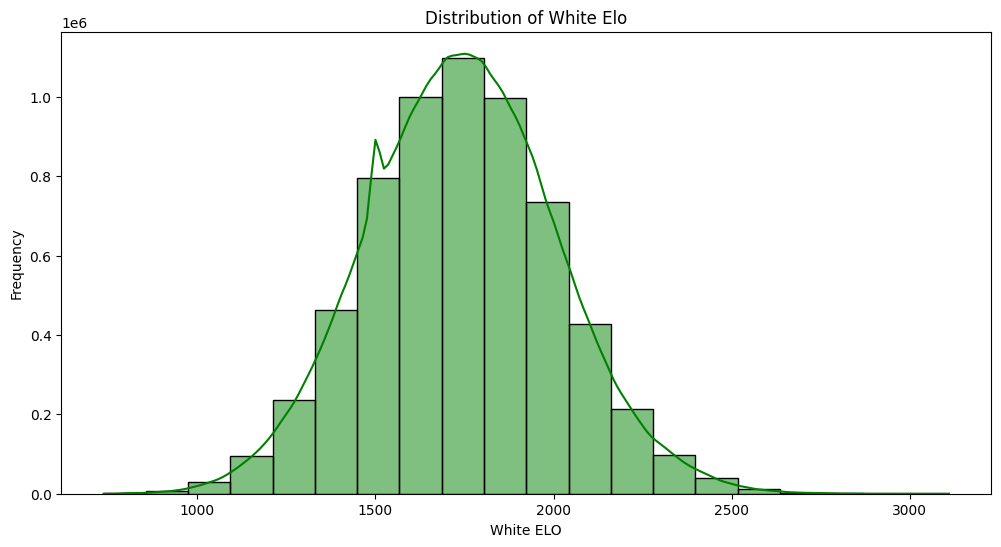

In [26]:
plt.figure(figsize=(12, 6))

sns.histplot(ddf['WhiteElo'], bins=20, kde=True, color='green')

plt.xlabel('White ELO')
plt.ylabel('Frequency')

plt.title('Distribution of White Elo')

* Histogram of Black Elo using Seaborn

Text(0.5, 1.0, 'Distribution of Black Elo')

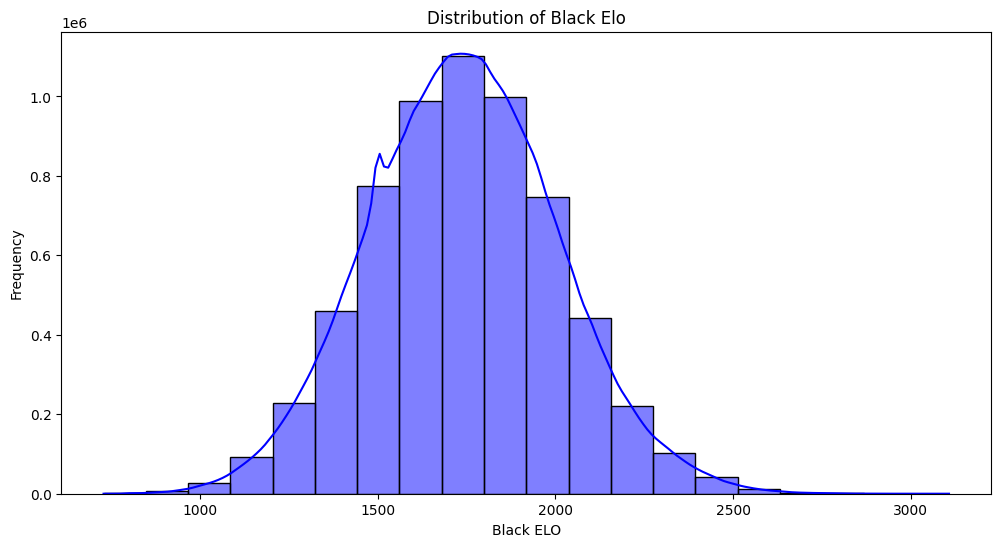

In [27]:
plt.figure(figsize=(12, 6))

sns.histplot(ddf['BlackElo'], bins=20, kde=True, color='blue')

plt.xlabel('Black ELO')
plt.ylabel('Frequency')

plt.title('Distribution of Black Elo')

* Bar plot of game results

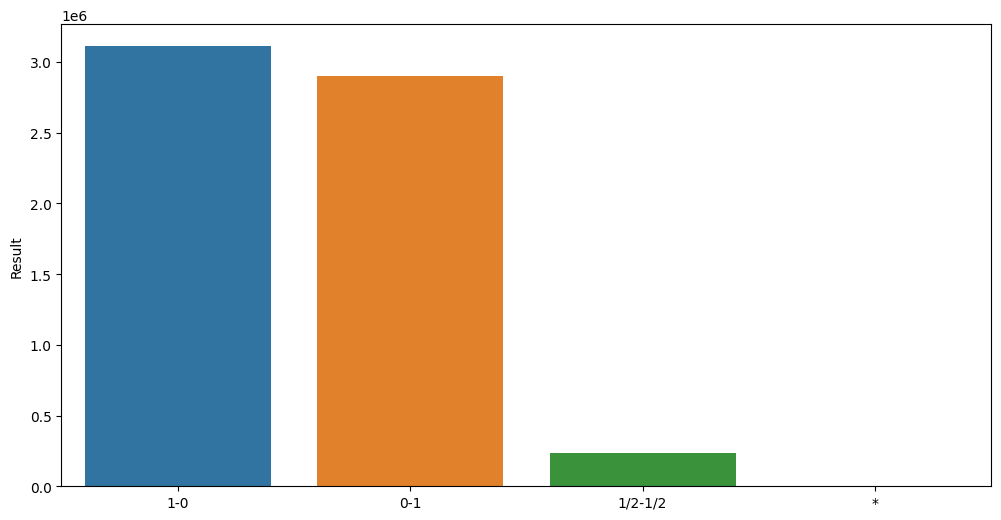

In [28]:
plt.figure(figsize=(12, 6))

df_for_plot = ddf.compute()

sns.barplot(x=df_for_plot['Result'].value_counts().index, y=df_for_plot['Result'].value_counts())
plt.show()

* Releasing memory by deleting unused variables

In [29]:
del df_for_plot

In [30]:
gc.collect()

3635

* Scatter plot of Opening moves used

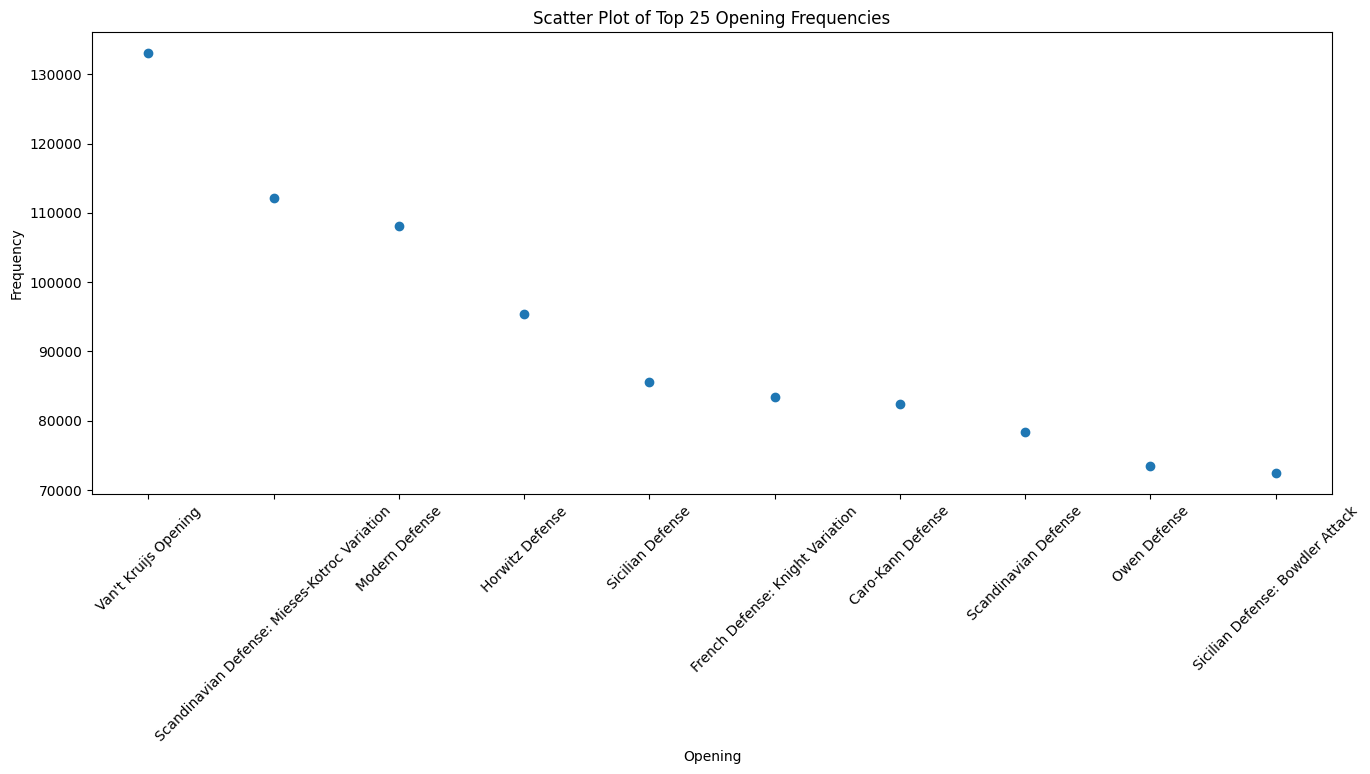

In [31]:
plt.figure(figsize=(16, 6))

scatter_column = 'Opening'

df_for_plot = ddf[scatter_column].compute()
value_counts = df_for_plot.value_counts()

top_10_moves = value_counts.head(10)

plt.scatter(x=top_10_moves.index, y=top_10_moves.values)
plt.xlabel(scatter_column)
plt.ylabel('Frequency')
plt.title(f'Scatter Plot of Top 25 {scatter_column} Frequencies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

* Releasing memory by deleting unused variables

In [32]:
del df_for_plot
del value_counts
del top_10_moves
del BElo_std
del WElo_std
del black_wins_count
del white_wins_count
del c_max
del c_min
del col
del col_type
del mean_BElo
del mean_Brdiff
del mean_WElo
del mean_Wrdiff
del mean_black_win
del mean_white_win
del unique_values_counts

In [33]:
gc.collect()

3687

###c. Data Exploration: Explore the dataset's structure and identify any patterns, trends, or anomalies. Pay attention to variables' distributions, relationships, and potential insights.

* Finding the most used Opening

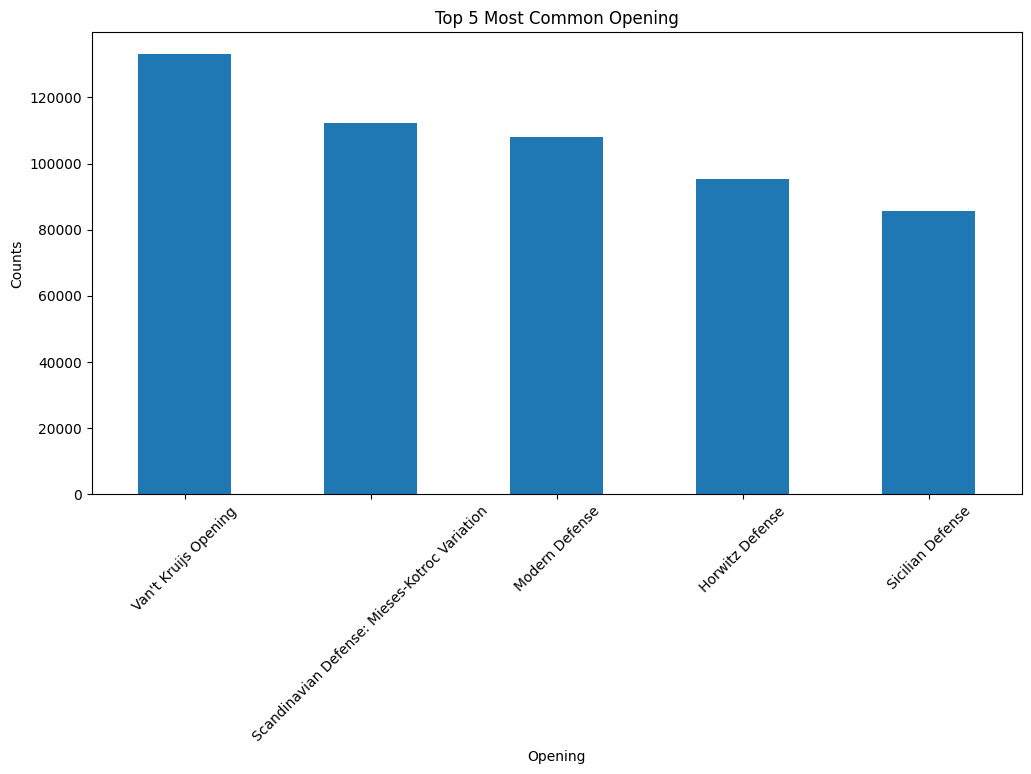

In [34]:
plt.figure(figsize=(12, 6))

opening_count = ddf['Opening'].value_counts().compute()

top_5_openings = opening_count.head(5)

top_5_openings.plot(kind='bar')

plt.xlabel('Opening')
plt.ylabel('Counts')
plt.title('Top 5 Most Common Opening')
plt.xticks(rotation=45)

plt.show()

* Plot histograms for numerical columns

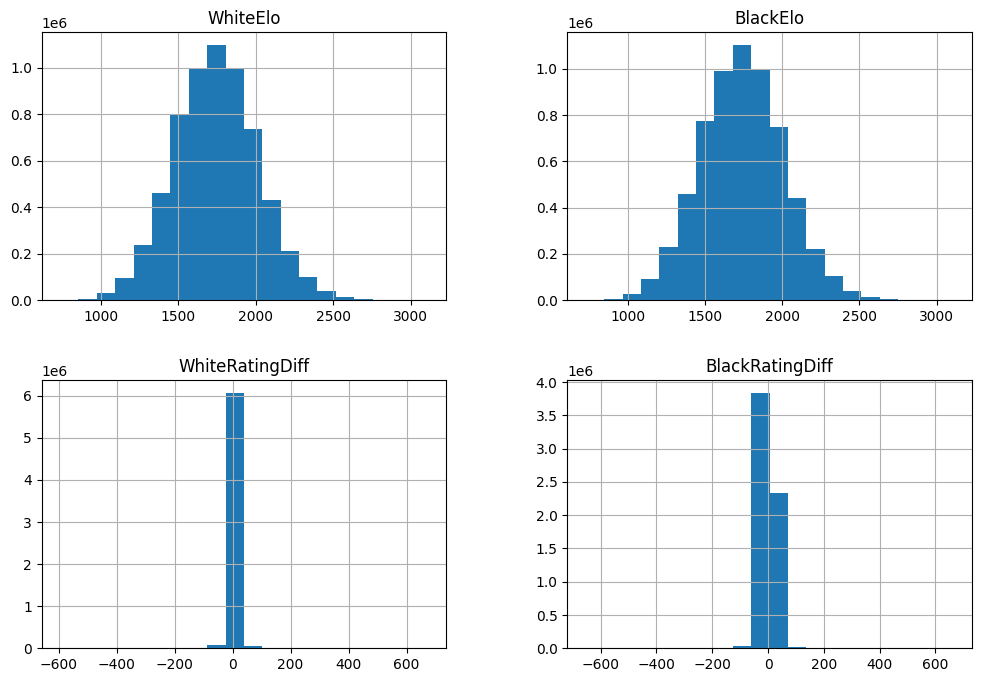

In [35]:
numerical_columns = ['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']
ddf[numerical_columns].compute().hist(bins=20, figsize=(12, 8))
plt.show()

* Explore relationships between Elo ratings


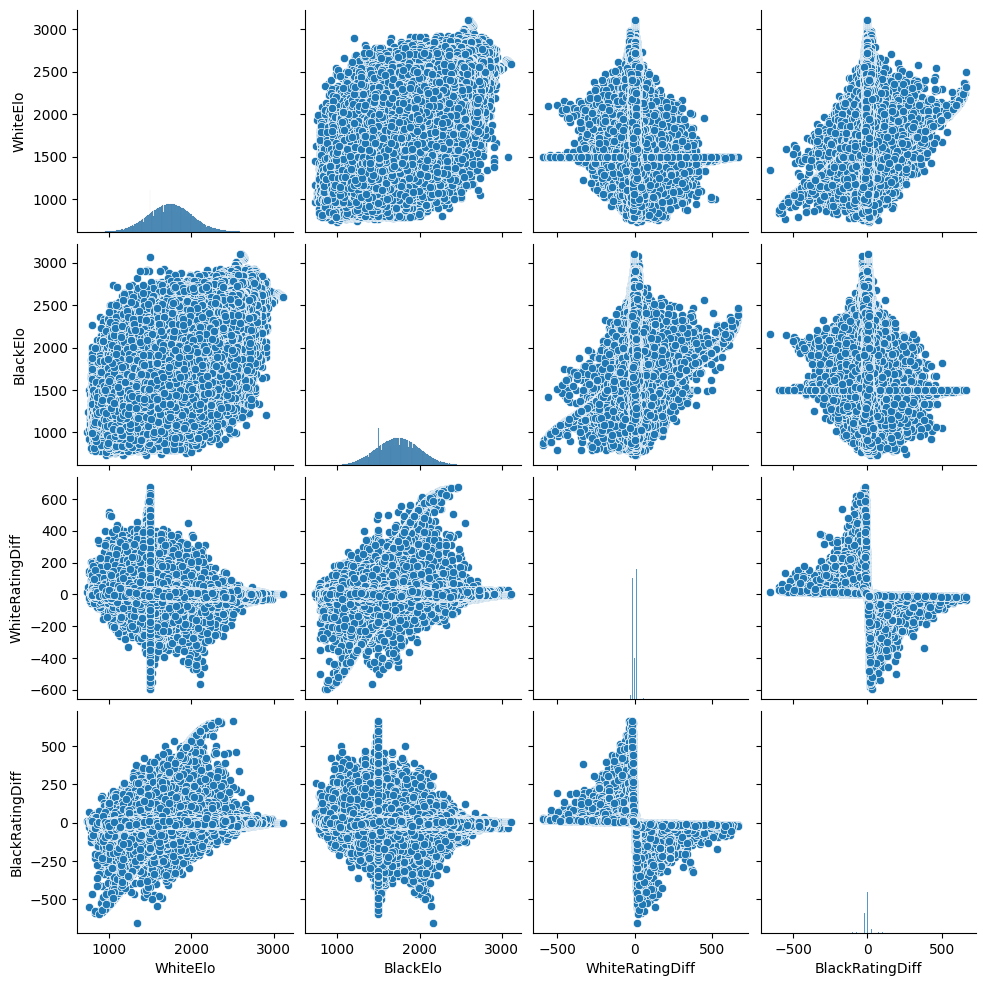

<Figure size 1200x600 with 0 Axes>

In [36]:
sns.pairplot(ddf.compute(), vars=['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff'])
plt.figure(figsize=(12, 6))

plt.show()

* Explore the distribution of results

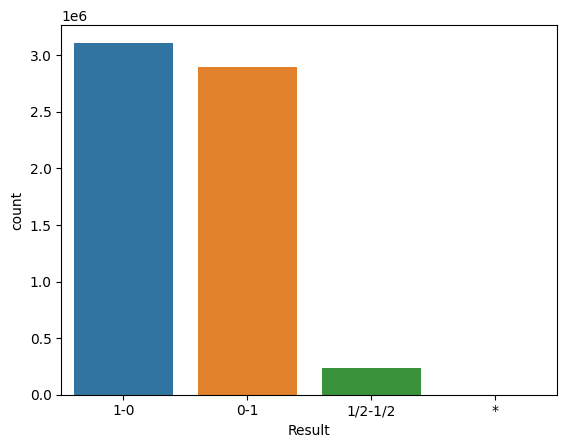

<Figure size 1200x600 with 0 Axes>

In [37]:
sns.countplot(data=ddf.compute(), x='Result')
plt.figure(figsize=(12, 6))

plt.show()

* Explore trends over time

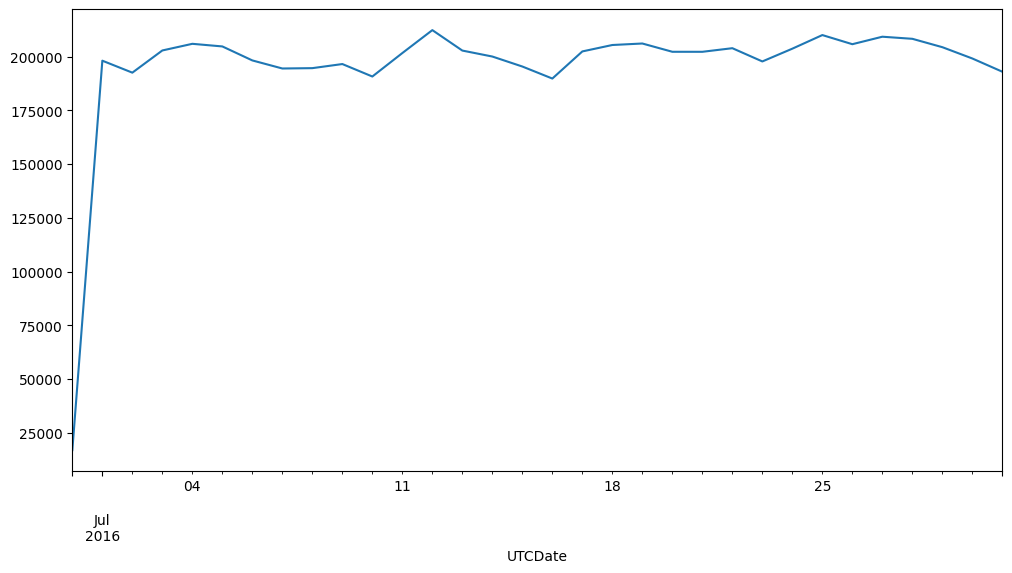

In [38]:
ddf.groupby('UTCDate').size().compute().plot(figsize=(12, 6))
plt.show()

* Explore the distribution of the 'Event' column

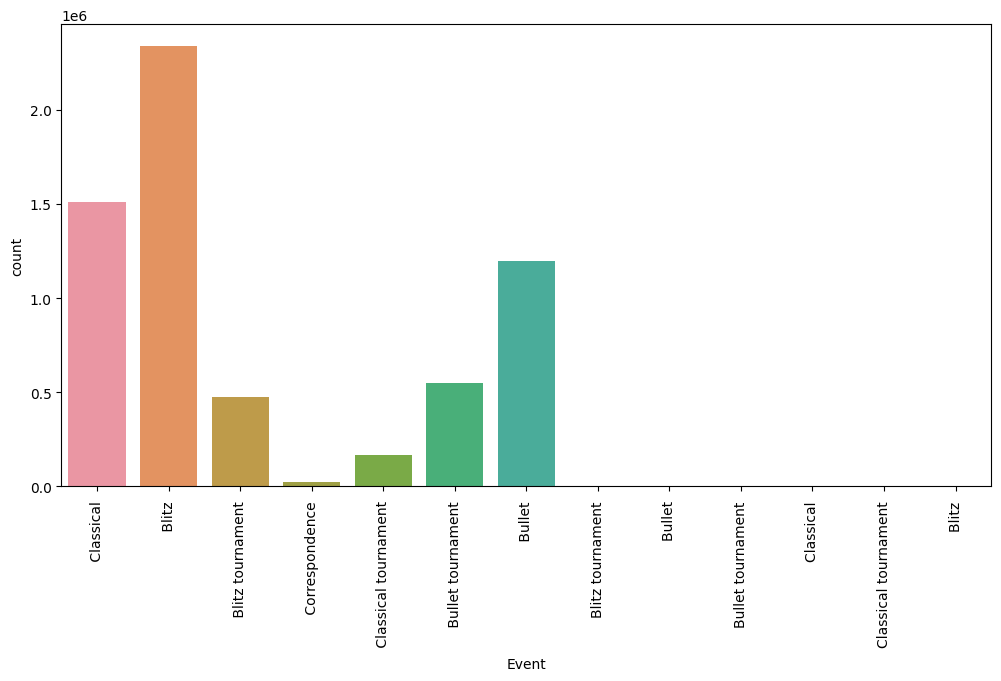

In [39]:
plt.figure(figsize=(12, 6))

sns.countplot(data=ddf.compute(), x='Event')
plt.xticks(rotation=90)
plt.show()

###d. Feature Engineering: If applicable, create new features or transform existing ones to better support your analysis.

* Create a new feature representing the average Elo rating of the players in each game

In [40]:
ddf['AvgElo'] = (ddf['WhiteElo'] + ddf['BlackElo']) / 2

* Create a new feature representing the count of moves in each game

In [41]:
ddf['MoveCount'] = ddf['AN'].str.split().apply(len, meta=('AN', 'int'))